<a href="https://colab.research.google.com/github/harnalashok/deeplearning-sequences/blob/main/stock_price_prediction_multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 6th Feb, 2023
# Objective: Apply LSTM for time-series prediction
#            Develop a simple model to predict stock prices

# Ref: https://www.simplilearn.com/tutorials/deep-learning-tutorial/rnn
# https://www.kaggle.com/datasets/akram24/google-stock-price-test


## Call libraries

In [ ]:
# 1.0 Call libraries
import numpy as np
import pandas as pd
import tensorflow as tf

# 1.0.1
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pathlib

In [ ]:
# 1.0.2 Display multiple outputs from a cell:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Mount gdrive

In [ ]:
# 2.0 Mount gdrive

from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 2.1 Path to data folder:

path = "/gdrive/MyDrive/Colab_data_files/stock_price"

# 2.1.1 Transform to pathlib object:
data_folder=pathlib.Path(path)

## Read train/test data

In [ ]:
# 3.0
train = pd.read_csv(data_folder / "Google_Stock_Price_Train.csv")
test = pd.read_csv(data_folder / "Google_Stock_Price_Test.csv")

In [ ]:
# 3.0.1
train.head()
print("\n============\n")
train.shape

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


(1258, 6)

## Process data

In [ ]:
# 4.0 We wil only use 'Open' column for prediction:

tr = train.iloc[:,1:3]
te = test.iloc[:,1:3]
tr.head()
print("\n=============\n")
tr.shape    # (1258, 2)
print("\n=============\n")
te.shape     # (20, 2)

,Open,High
0,325.25,332.83
1,331.27,333.87
2,329.83,330.75
3,328.34,328.77
4,322.04,322.29


(1258, 2)

(20, 2)

In [ ]:
# 4.1 Normalize data:

mm = MinMaxScaler(feature_range = (0,1))

# 4.1.0 Transformed output is numpy array"
tr = mm.fit_transform(tr)
te = mm.transform(te)


In [ ]:
tr[:2, :]
print("\n============\n")
te[:2,:]

array([[0.08581368, 0.09640129],
       [0.09701243, 0.09834351]])

array([[0.92955205, 0.94948363],
       [0.94731751, 0.95267709]])

In [ ]:
tr[0,0]

0.08581367661284323

## Organize and reshape data
Suppose our data is:<br>
23,34,56,78,93,12,34,67,23
Let timesteps be 3: <br>
Then, we want to have the follwing pieces of train--target:
>`train--target`<br>
>`23,34,56--78`<br>
`34,56,78--93`<br>
`56,78,93--12`<br>
`78,93,12--34`<br>
`93,12,34--67`<br>
`12,34,67--23`<br>

### Experimental code

In [ ]:
# 5.0 Constants
timesteps = 3
data = np.array([23,34,56,78,93,12,34,67,23])

In [ ]:
# 5.1 Organize: 
xtr = []
ytr = []
for i in range(timesteps,len(data)):
  xtr.append(data[i-timesteps:i])
  ytr.append(data[i])

In [ ]:
# 5.2
xtr    # A list of arrays
print("\n==========\n")
ytr

[array([23, 34, 56]),
 array([34, 56, 78]),
 array([56, 78, 93]),
 array([78, 93, 12]),
 array([93, 12, 34]),
 array([12, 34, 67])]

[78, 93, 12, 34, 67, 23]

### Real code


In [ ]:
# 6.0
timesteps = 60
X_train = []
y_train = []

for i in range(timesteps,len(tr)):
  X_train.append(tr[i-60:i,:])
  y_train.append(tr[i,0])

In [ ]:
# 6.1 Transform to arrays
X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
# 6.2 X_train is an array of arrays:
type(X_train)
print("\n========\n")
X_train.shape
print("\n========\n")
type(X_train[0][:])
print("\n========\n")
X_train[0][:].shape      # (1198, 60) there are 1198 arrays, each of size 60

numpy.ndarray

(1198, 60, 2)

numpy.ndarray

(60, 2)

In [ ]:
# 6.3 Reshape to : (samples,timesteps,noOfFeatures):

X_train= np.reshape(X_train, (X_train.shape[0],X_train.shape[1],2))
X_train.shape    # (1198, 60, 2)

(1198, 60, 1)

## Model

In [ ]:
# 7.0
model = tf.keras.Sequential()

In [ ]:
# 7.1
model.add(tf.keras.layers.Input(shape = (X_train.shape[1], 2)))

In [ ]:
# 7.2
model.add(tf.keras.layers.LSTM(
                                units = 50,
                                return_sequences = True
                               )
         )

In [ ]:
# 7.3
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# 7.4
model.add(tf.keras.layers.LSTM(
                               units = 50,
                               return_sequences = True)
                              )

In [ ]:
# 7.5
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# 7.6
model.add(tf.keras.layers.LSTM(units = 50))

In [ ]:
# 7.7
model.add(tf.keras.layers.Dropout(0.1))

In [ ]:
# 7.8
model.add(tf.keras.layers.Dense(1))

In [ ]:
# 7.9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

## Model comilation and fitting

In [ ]:
# 8.0 Compile:
model.compile(optimizer = "adam", loss = "mse")

In [ ]:
# 9.0
model.fit(
          X_train,y_train,
          batch_size = 32,
          epochs = 100
          )

Epoch 1/100
38/38 [==============================] - 10s 93ms/step - loss: 0.0447
Epoch 2/100
38/38 [==============================] - 5s 143ms/step - loss: 0.0042
Epoch 3/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0035
Epoch 4/100
38/38 [==============================] - 3s 91ms/step - loss: 0.0033
Epoch 5/100
38/38 [==============================] - 5s 126ms/step - loss: 0.0034
Epoch 6/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0031
Epoch 7/100
38/38 [==============================] - 5s 132ms/step - loss: 0.0029
Epoch 8/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0029
Epoch 9/100
38/38 [==============================] - 5s 137ms/step - loss: 0.0026
Epoch 10/100
38/38 [==============================] - 5s 140ms/step - loss: 0.0027
Epoch 11/100
38/38 [==============================] - 4s 93ms/step - loss: 0.0026
Epoch 12/100
38/38 [==============================] - 6s 151ms/step - loss: 0.0025
Epoch 13/100
38/

## MAke predictions

In [ ]:
# 10.0
te.shape   # (20, 2)
tr.shape  # (1258, 2)

(20, 2)

(1258, 2)

In [ ]:
# 10.1 Combined data:
combined_df=pd.concat([train_data['Open'],test_data['Open']],axis = 0)
combined_df.shape    # (1278,)

(1278,)

In [ ]:
combined_df = np.vstack([tr, te])
combined_df.shape

(1278, 2)

In [ ]:
# 10.2 Data for test predictions:
inputs = combined_df[len(combined_df) - len(te) - 60:]
inputs.shape   # (80,2)

(80, 2)

In [ ]:
# 10.3
inputs = inputs.reshape(-1,1)
inputs.shape   # (80, 1)

(80, 1)

In [ ]:
# 11.0 Transform inputs:

inputs = mm.transform(inputs)


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 11.1 PRepare from inputs data:
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i,:])


In [ ]:
len(X_test)    # 20
print("\n===========\n")
X_test[0].shape
print("\n===========\n")
X_test = np.array(X_test)
X_test.shape   # (20, 60)

20

(60, 2)

(20, 60, 2)

In [ ]:
# 11.2 Reshape X_test:

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(20, 60, 1)

In [ ]:
# 11.3 MAke predictions

pred = model.predict(X_test)
pred
pred.shape



In [ ]:
out = np.hstack([pred,pred])

In [ ]:
# 11.4 Inverse transform
pred = mm.inverse_transform(out)

In [ ]:
pred

array([[785.59235, 785.71326],
       [785.17114, 785.2937 ],
       [787.8559 , 787.968  ],
       [790.69135, 790.7924 ],
       [797.1983 , 797.27405],
       [803.00714, 803.0603 ],
       [804.8778 , 804.9237 ],
       [803.62103, 803.6719 ],
       [802.1088 , 802.1655 ],
       [802.65643, 802.711  ],
       [802.5447 , 802.5996 ],
       [802.21783, 802.27405],
       [803.2098 , 803.2622 ],
       [803.7361 , 803.7864 ],
       [808.35803, 808.3904 ],
       [815.2155 , 815.22125],
       [822.68   , 822.6567 ],
       [827.50757, 827.4655 ],
       [829.42114, 829.3717 ],
       [818.91345, 818.9048 ]], dtype=float32)

## Plotting results

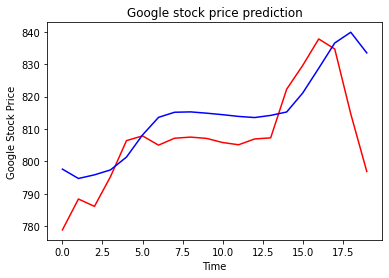

In [ ]:
# 12.0 Plot 
real_stock_price = test_data
plt.plot(real_stock_price, color='red', label = "Real Google Stock Price");
plt.plot(pred, color = 'blue', label = "PRedicted google stock price") ;
plt.title("Google stock price prediction") ;
plt.xlabel("Time") ;
plt.ylabel("Google Stock Price");
plt.show() ;

In [ ]:
test.values[:, 1]

array([778.81, 788.36, 786.08, 795.26, 806.4, 807.86, 805.0, 807.14,
       807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3, 829.62,
       837.81, 834.71, 814.66, 796.86], dtype=object)

In [ ]:
te[:,0]

array([0.92955205, 0.94731751, 0.94307612, 0.96015329, 0.98087655,
       0.98359253, 0.97827219, 0.98225314, 0.98288563, 0.98214153,
       0.979779  , 0.97849542, 0.98182528, 0.98245777, 1.01045465,
       1.02407173, 1.03930724, 1.03354044, 0.99624228, 0.9631297 ])

In [ ]:
te[:,0]

array([0.92955205, 0.94731751, 0.94307612, 0.96015329, 0.98087655,
       0.98359253, 0.97827219, 0.98225314, 0.98288563, 0.98214153,
       0.979779  , 0.97849542, 0.98182528, 0.98245777, 1.01045465,
       1.02407173, 1.03930724, 1.03354044, 0.99624228, 0.9631297 ])

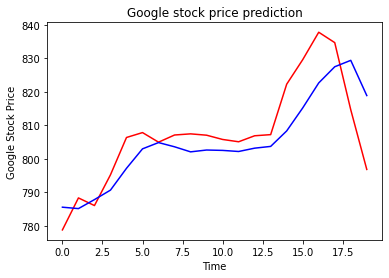

In [ ]:
# 12.0 Plot 
real_stock_price = test.values[:, 1]
plt.plot(real_stock_price, color='red', label = "Real Google Stock Price");
plt.plot(pred[:,0], color = 'blue', label = "PRedicted google stock price") ;
plt.title("Google stock price prediction") ;
plt.xlabel("Time") ;
plt.ylabel("Google Stock Price");
plt.show() ;

In [ ]:
################## I am done ##################33

In [ ]:
! pip install attention

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
